<a href="https://colab.research.google.com/github/steed360/Data-Analysis/blob/main/a_Regression_Errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Create charts to illustrate and better understand which distributions of Y will produce linear regression models that satisfy the "regression assumptions", including:

- Error terms will be normally distributed
- Same std deviation for the error term regardless of position along X

Method:

Part One:

- Firstly start with a fitted model (estimating height for a given weight)
- Plot the regression line and the error distribution for a few points X
- Generate data for each xi,
  i.e. create normal distributions for yi~N( mean = + 154cm + weight * slope , std= 4)
- In this simple example regression could be seen as basicaly a few conditional Normal Distributions
- Show the distribution of the "dataset" that would have so perfectly met these regression assumptions.
- Specifically gather the data sampled from Normal (Y1) Normal (Y2) etc into one array and show what distribution we get.  Is it Normally Distributed?

Part Two:

- Positively skewed data with long tails includes income data, travel data, survival times.
- Books warn that trying to explain such data with a regression model is likely to break the constant error variance "regression assumption"
- Repeat the data sampling in Part One (again sample from the regression equation)
- This time increase the variance for the last two points.
- Again, collect the conditional data sampled from each Xi and throw it all into one array.
- What is the shape of the distribution of the Y data?


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import pandas.api.types as pdtypes # for (sorted) categories.

import matplotlib.pyplot as plt

import scipy.stats as stats

import arviz as az

import plotnine
#from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine import ggplot  # https://plotnine.readthedocs.io/en/stable/
from plotnine import geom_violin, geom_density

import matplotlib
from matplotlib import gridspec

%matplotlib inline

from mizani import formatters # for better axis labelling
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.patches import Rectangle


In [18]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [4]:
# configure plot font family to Arial
#plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
#matplotlib.rcParams['mathtext.fontset'] = 'custom'
#matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
#matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [5]:
# Specify the chart layout (PowerBI all is forgiven.... :)

def SWD_theme ():

    font = "Arial" # doesn't work on Colab
    #t=theme_minimal(base_size = 10, base_family = font )
    t=theme_minimal(base_size = 10 )

    t2 = theme(
      #panel_grid_major = element_blank(),
      panel_grid_major = element_line(size = 0.5, color = GRAY9),
      panel_grid_minor = element_line(size = 0.5, color = GRAY9),

      #panel_grid_minor = element_blank(),
      axis_line = element_line(size = .1, color = GRAY9),
      axis_text = element_text(color = GRAY3, size = 12),
      #axis.ticks.x = element_line(size = 0.5, color = GRAY9),
      #axis.ticks.y = element_line(size = 0.5, color = GRAY9),
      axis_title = element_text(color = GRAY3),
      #axis_title_y = element_text(hjust = 1, margin = margin(0, 6, 0, 15, "pt")),
      #axis_title_x = element_text(hjust = 0, margin = margin(6, 0, 15, 0, "pt")),
      #plot_subtitle = element_text(color = GRAY4, size= 8),
      plot_title = element_text(color = GRAY4, size= 12 ),
      # I don't think this line is implemented in plotnine
      #plot_title_position = "plot", # This aligns the plot title to the very left edge
      #plot_caption = element_text(hjust = 0, color = GRAY6),
      #plot_caption_position = "plot",
      #plot_margin = margin(.5,.5,.5,.5,"cm"),
      #plot_margin = (0.4 ),
      strip_text = element_text(color = GRAY7))

    return t+ t2

# Part One

#### Sample from the normal distribution for each of the four points, specifically sample from N ( mu = 30, s= 5), N (mu=40, s=5) etc

In [6]:
# Specify some x values.
lst_x =  [i for i in range ( 20,60, 10)]
np_x = np.array ( lst_x)


# Produce some Yi values using
# a model of height = function (weight) from Statistical Rethinking
# Place in a dict for later retrieval.


b_weight_kg = 0.9
c_avg_height_cm = 154
sd = 5.0  # standard deviation of errors.

dictYi = {}

for xi in lst_x:
  dictYi[xi] = c_avg_height_cm  + b_weight_kg * xi

dictYi


{20: 172.0, 30: 181.0, 40: 190.0, 50: 199.0}

In [7]:
#####################################
# A simple data frame is needed to do a line chart
###################################

lst_Yi = [dictYi[xi] for xi in dictYi.keys() ]

data_x_y = pd.DataFrame ( {'x':lst_x,'y':lst_Yi})

# Currently doing this as a categorical variable because the violin plot requires a categorical X Axis
data_x_y['variable'] = data_x_y['x'].astype(pdtypes.CategoricalDtype(categories=[20,30,40,50]))
data_x_y['group'] = 1

data_x_y

,x,y,variable,group
0,20,172.0,20,1
1,30,181.0,30,1
2,40,190.0,40,1
3,50,199.0,50,1


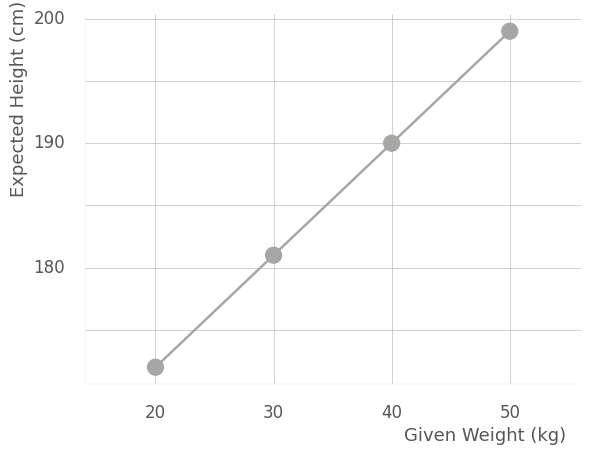

<ggplot: (8461937950588)>

In [19]:
from plotnine import geom_violin
from plotnine import ggplot, aes, theme

t = theme(
          # Overrides
          axis_title_y = element_text(angle = 90, va = 'bottom', ha = 'left', size = 13, color = GRAY3, y = 0.5),
          axis_title_x = element_text(  size = 13, color = GRAY3, x=0.75),
          #panel_grid_major_y=element_blank(),
          legend_position="none"
)

lsize = 0.1
shift = -0.06
shift_point = 0.07

# For shifting the violin plot
def alt_sign(x):
    "Alternate +1/-1 if x is even/odd"
    #return (-1) ** x
    return

fig = \
(ggplot()
  + geom_line (data_x_y,aes( x='variable', y='y', group = 'group', size=2),color=GRAY8 )
  + geom_point (data_x_y, aes( x='variable', y='y',size=10), color=GRAY8 )
  + labs(y = "Expected Height (cm)    "  , x = "Given Weight (kg)")
  +  SWD_theme() + t

)

fig

Sample from the 4 normal distributions (specifing a constant st dev of 5 cm)

In [9]:
dictYi

{20: 172.0, 30: 181.0, 40: 190.0, 50: 199.0}

In [10]:
# Specify some x values.
lst_x =  [i for i in range ( 20,60, 10)]
np_x = np.array ( lst_x)


# Produce some Yi values using
# a model of height = function (weight) from Statistical Rethinking
# Place in a dict for later retrieval.


b_weight_kg = 0.9
c_avg_height_cm = 154
sd = 5.0  # standard deviation of errors.

N = 100              # Number of data points to generate.
#N = 100000              # Number of data points to generate.

# Create a dataframe (with x as columns and yi~N() samples as rows)

df = pd.DataFrame()

for xi in lst_x:
    yi = dictYi[xi]
    df[xi] = stats.norm.rvs(yi , 5, N)

###################################

# A long version of this dataframe is needed for plotting as violin plots
import pandas.api.types as pdtypes # for (sorted) categories.
df_long = pd.melt(df,value_vars=[20,30,40,50]  )
df_long['variable'] = df_long['variable'].astype(pdtypes.CategoricalDtype(categories=[10,20,30,40,50,60]))




Do violin plot

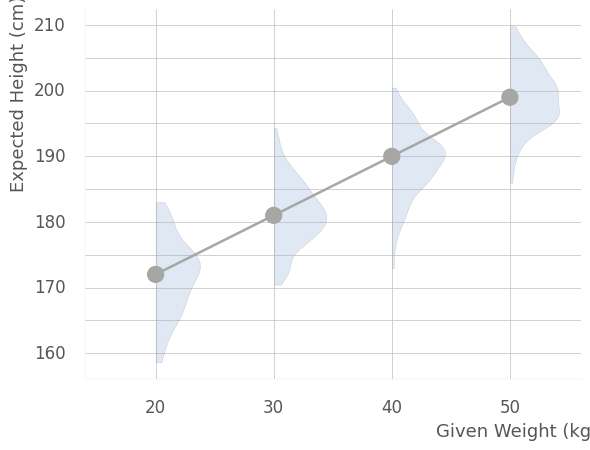

<ggplot: (8461941364478)>

In [11]:
from plotnine import geom_violin
from plotnine import ggplot, aes

t = theme(
          # Overrides
          axis_title_y = element_text(angle = 90, va = 'bottom', ha = 'left', size = 13, color = GRAY3, y = 0.5),
          axis_title_x = element_text(  size = 13, color = GRAY3, x=0.8),
          #panel_grid_major_y=element_blank(),
          legend_position="none"
)

lsize = 0.1
shift = -0.06
shift_point = 0.07

# For shifting the violin plot
def alt_sign(x):
    "Alternate +1/-1 if x is even/odd"
    #return (-1) ** x
    return

m1 = aes(x=stage('variable', after_scale='x+shift*x'))                 # shift outward
m2 = aes(x=stage('variable', after_scale='x+shift_point*x'))           # shift outward
m3 = aes( stage('variable', after_scale='x+shift_point*x' ),y='vals' )

fig = \
(ggplot(df_long, aes('variable', 'value',group = 'variable'))
  + geom_violin( alpha=0.3, color=GRAY8, fill=BLUE3, style="right", size=lsize)
  #+ geom_point(m2, alpha=0.005, color=GRAY8,size=0.2)
  + geom_line (data_x_y,aes( x='variable', y='y', group = 'group', size=2),color=GRAY8 )
  + geom_point (data_x_y, aes( x='variable', y='y',size=10), color=GRAY8 )
  + labs(y = "Expected Height (cm)     "  , x = "Given Weight (kg)")
  +SWD_theme() + t
)


fig

Plot the densities
- Each of the conditional normal distributions
- Originating Distribution: Building up a distribution by sampling an equal number of value from each of the 4 conditional normal distributions
- Lastly, find the meand and std. dev. of the above distribution. Sample from a Normal Distribution using these parameters.

The last step is intended to give a visual comparison of the originating distribution and a normal one with the same mean and variance.

In [12]:
# Find the mean and standard deviation in order to give a comparison.
std1 = np.std (df_long['value'] )
mu1  = np.mean (df_long['value'] )
# Repeat the distribution for the data sampled from across the 4 conditional normal dists
# And add the properly shaped normal one just defined

df_Normal = pd.DataFrame ( { 'value': stats.norm.rvs( mu1 ,std1, N) })

(0.0, 1.0, 0.0, 1.0)

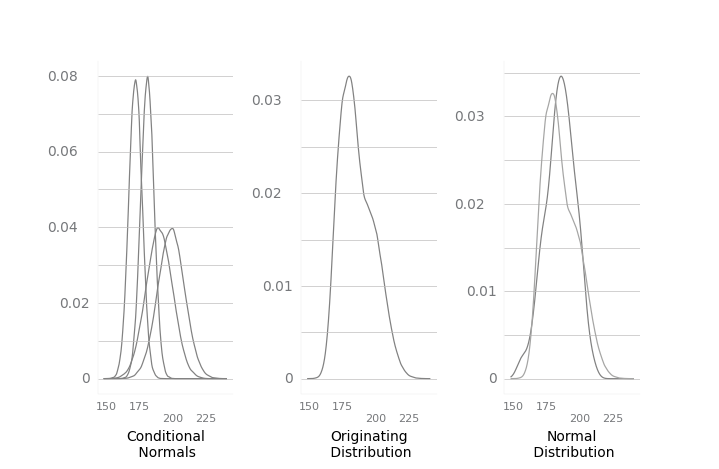

In [31]:
t = theme(
          # Overrides
          axis_title_y = element_text(angle = 90, va = 'bottom', ha = 'left', size = 13, color = GRAY3, y = 0.8),
          axis_title_x = element_text(  size = 13, color = GRAY3, x=0.8),
          #panel_grid_major_y=element_blank(),
          panel_grid_major_x=element_blank(),
          panel_grid_minor_x=element_blank(),
          axis_text_y = element_text( color=GRAY5, size=10)  ,
          axis_text_x = element_text( color=GRAY5, size=8)  ,
          legend_position="none"
)

# Conditional distributions
p1 = \
  (ggplot(df_long, aes(x='value', group='variable') )
  + geom_density (alpha=0.1, color=GRAY6)
  + labs(y = "Density     "  , x = "Given Weight (kg)")
  + scale_x_continuous(limit = [150, 220])
   +SWD_theme() + t
)

# Originating distribution
p2 = \
  (ggplot(df_long, aes(x='value'))
  + geom_density (alpha=0.1,  color=GRAY6)
  + labs(y = "Density     "  , x = "Given Weight (kg)")
  +SWD_theme() + t
)

# Normal Distribution
p3 = \
  (ggplot(df_Normal, aes(x='value'))
  + geom_density (alpha=0.1,  color=GRAY6)
  + geom_density (df_long, aes(x='value'), color=GRAY8 )
  + labs(y = "Density     "  , x = "Given Weight (kg)")
  +SWD_theme() + t
)

# Empty plotnine figure to place the subplots on. Needs junk data (for backend "copy" reasons).
fig = (ggplot()+geom_blank(data=df) +theme_void()).draw(show=False, return_ggplot=False)

# Create gridspec for adding subpanels to the blank figure
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

gs.update(wspace=0.5, hspace=0.05) # set the spacing between axes.

# Add subplots to the figure
_=p1._draw_using_figure(fig, [ax1])
_=p2._draw_using_figure(fig, [ax2] )
_=p3._draw_using_figure(fig, [ax3] )

fig.dpi = 100
width_in = 7
fig.set_size_inches(width_in , width_in/1.62)

# X axis labels.
fig.axes[1].set_xlabel ('Conditional\n Normals')
fig.axes[2].set_xlabel ('Originating\n Distribution')
fig.axes[3].set_xlabel ('Normal\n Distribution')

ax0 = fig.add_axes( (0,0,1,1))
ax0.axis('Off') # don't draw anything.

## So in summary
### In this case the data that created a "perfect" linear model was not a normal distribution. The distribution is a bit wider (like a T-Distrbution?).  However, it is worth nothing that there was also no skew in the originating distribution.

# Part 2

As before Sample from the 4 Normal Distributions but this time
- The std. dev. for esimated height is still 5 at 20&30 kg
- But the std. dev. for esimated height is 10 at 40&50 kg


In [15]:
# Specify some x values.
lst_x =  [i for i in range ( 20,60, 10)]
np_x = np.array ( lst_x)


# Produce some Yi values using
# a model of height = function (weight) from Statistical Rethinking
# Place in a dict for later retrieval.

b_weight_kg = 0.9
c_avg_height_cm = 154
sd = 5.0  # standard deviation of errors.


N = 100000              # Number of data points to generate.

# Create a dataframe (with x as columns and yi~N() samples as rows)

df = pd.DataFrame()

for xi in lst_x:
    yi = dictYi[xi]
    if xi <= 30:
      df[xi] = stats.norm.rvs(yi , 5, N)
    else:
      df[xi] = stats.norm.rvs(yi , 10, N)

###################################

# A long version of this dataframe is needed for plotting as violin plots
import pandas.api.types as pdtypes # for (sorted) categories.
df_long = pd.melt(df,value_vars=[20,30,40,50]  )
df_long['variable'] = df_long['variable'].astype(pdtypes.CategoricalDtype(categories=[10,20,30,40,50,60]))



Redo the violin plot

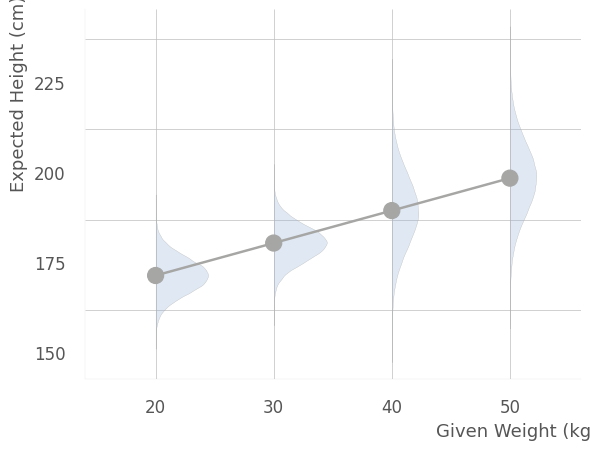

<ggplot: (8461937858311)>

In [16]:
from plotnine import geom_violin
from plotnine import ggplot, aes

t = theme(
          # Overrides
          axis_title_y = element_text(angle = 90, va = 'bottom', ha = 'left', size = 13, color = GRAY3, y = 0.5),
          axis_title_x = element_text(  size = 13, color = GRAY3, x=0.8),
          panel_grid_major_y=element_blank(),
          legend_position="none"
)

lsize = 0.1
shift = -0.06
shift_point = 0.07

# For shifting the violin plot
def alt_sign(x):
    "Alternate +1/-1 if x is even/odd"
    #return (-1) ** x
    return

m1 = aes(x=stage('variable', after_scale='x+shift*x'))                 # shift outward
m2 = aes(x=stage('variable', after_scale='x+shift_point*x'))           # shift outward
m3 = aes( stage('variable', after_scale='x+shift_point*x' ),y='vals' )

fig = \
(ggplot(df_long, aes('variable', 'value',group = 'variable'))
  + geom_violin( alpha=0.3, color=GRAY8, fill=BLUE3, style="right", size=lsize)
  #+ geom_point(m2, alpha=0.005, color=GRAY8,size=0.2)
  + geom_line (data_x_y,aes( x='variable', y='y', group = 'group', size=2),color=GRAY8 )
  + geom_point (data_x_y, aes( x='variable', y='y',size=10), color=GRAY8 )
  + labs(y = "Expected Height (cm)     "  , x = "Given Weight (kg)")
  +SWD_theme() + t
)


fig

## So in summary
#### The originating distribution for height is definately a little skewed to the right.  Does this really tell us anything though?